In [13]:
import torch
from tqdm.notebook import tqdm
%cd /home/jet08013/GitHub/Math-5800-Spring-2020/

/home/jet08013/GitHub/Math-5800-Spring-2020


In [14]:
torch.cuda.is_available()

True

In [15]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [16]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((.5,),(.5,))])

In [17]:
trainset = torchvision.datasets.MNIST('./data',download=True, train=True,transform=transform)
testset = torchvision.datasets.MNIST('./data',download=True,train=False,transform=transform)

In [18]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [19]:
device = torch.device("cuda:0")

In [35]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784,10,bias=False)
        self.soft = nn.Softmax(dim=1)
        
    def forward(self, x):
        return self.soft(self.linear(self.flatten(x)))

LR = Net()
LR.to(device)

Net(
  (flatten): Flatten()
  (linear): Linear(in_features=784, out_features=10, bias=False)
  (soft): Softmax(dim=1)
)

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(LR.parameters(), lr=.001)

In [37]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad() # initialize gradient calculation - we will do a batch of 4
        outputs = LR(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[{:d}, {:5d}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Done')

[1,  2000] loss: 1.765
[1,  4000] loss: 1.600
[1,  6000] loss: 1.595
[1,  8000] loss: 1.588
[1, 10000] loss: 1.584
[1, 12000] loss: 1.575
[1, 14000] loss: 1.572
[2,  2000] loss: 1.569
[2,  4000] loss: 1.571
[2,  6000] loss: 1.563
[2,  8000] loss: 1.561
[2, 10000] loss: 1.560
[2, 12000] loss: 1.567
[2, 14000] loss: 1.560
[3,  2000] loss: 1.557
[3,  4000] loss: 1.557
[3,  6000] loss: 1.553
[3,  8000] loss: 1.554
[3, 10000] loss: 1.558
[3, 12000] loss: 1.565
[3, 14000] loss: 1.557
[4,  2000] loss: 1.559
[4,  4000] loss: 1.557
[4,  6000] loss: 1.554
[4,  8000] loss: 1.549
[4, 10000] loss: 1.553
[4, 12000] loss: 1.555
[4, 14000] loss: 1.556
[5,  2000] loss: 1.553
[5,  4000] loss: 1.558
[5,  6000] loss: 1.552
[5,  8000] loss: 1.549
[5, 10000] loss: 1.550
[5, 12000] loss: 1.547
[5, 14000] loss: 1.551
Done


In [38]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = LR(images)
        _, pred = torch.max(outputs.data,1)
        total+=labels.size(0)
        correct += (pred==labels).sum().item()
print(correct/total)

0.9045


In [39]:
LR.linear

Linear(in_features=784, out_features=10, bias=False)

In [40]:
vars(LR.linear)

{'training': True,
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([[-0.0247, -0.0433, -0.0248,  ..., -0.0034,  0.0008, -0.0476],
                       [ 0.1176,  0.0948,  0.1090,  ...,  0.0775,  0.1325,  0.0856],
                       [-0.0578, -0.0721, -0.0433,  ..., -0.0575, -0.0565, -0.0295],
                       ...,
                       [ 0.0535,  0.0316,  0.0174,  ...,  0.0042,  0.0065,  0.0024],
                       [-0.0859, -0.0835, -0.0891,  ..., -0.0913, -0.0544, -0.0726],
                       [-0.0125,  0.0039,  0.0108,  ..., -0.0028, -0.0196, -0.0118]],
                      device='cuda:0', requires_grad=True)),
              ('bias', None)]),
 '_buffers': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_forward_hooks': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_modules': OrderedDict(),
 'in_features': 784,
 'out_features': 10}

In [41]:
filters = LR.linear._parameters['weight'].cpu().detach()

In [42]:
images = [filters[i,:].reshape(28,28) for i in range(10)]


TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

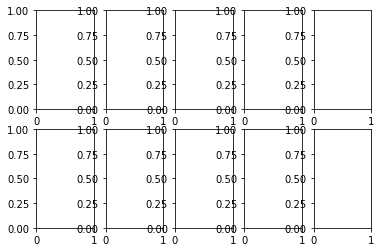

<Figure size 720x720 with 0 Axes>

In [57]:
fig, axes = plt.subplots(2,5)
plt.figure(figsize=(10,10))
for i in range(10):
    axes[i//5,i%5].imshow(images[i].numpy())

In [48]:
#No Softmax layer 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784,200,bias=False)
        self.hidden = nn.Linear(200,10,bias=False)
        
        
    def forward(self, x):
        flat = self.flatten(x)
        lin = self.linear(flat)
        hid = self.hidden(F.relu(lin))
        return hid

MLP = Net()
MLP.to(device)
print(MLP)        

Net(
  (flatten): Flatten()
  (linear): Linear(in_features=784, out_features=200, bias=False)
  (hidden): Linear(in_features=200, out_features=10, bias=False)
)


In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(MLP.parameters(), lr=.001)

for epoch in range(3):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad() # initialize gradient calculation - we will do a batch of 4
        outputs = MLP(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[{:d}, {:5d}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Done')

In [47]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = MLP(images)
        _, pred = torch.max(outputs.data,1)
        total+=labels.size(0)
        correct += (pred==labels).sum().item()
print(correct/total)

0.9569


In [66]:
#No Softmax layer 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(784,200,bias=False)
        self.extra = nn.Linear(200,100,bias=False)
        self.hidden = nn.Linear(100,10,bias=False)
        
        
    def forward(self, x):
        flat = self.flatten(x)
        lin = self.linear(flat)
        extra = self.extra(F.relu(lin))
        hid = self.hidden(F.relu(extra))
        return hid

MMLP = Net()
MMLP.to(device)
print(MMLP)        

Net(
  (flatten): Flatten()
  (linear): Linear(in_features=784, out_features=200, bias=False)
  (extra): Linear(in_features=200, out_features=100, bias=False)
  (hidden): Linear(in_features=100, out_features=10, bias=False)
)


In [69]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(MMLP.parameters(), lr=.001)

for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        optimizer.zero_grad() # initialize gradient calculation - we will do a batch of 4
        outputs = MMLP(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[{:d}, {:5d}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Done')

[1,  2000] loss: 0.170
[1,  4000] loss: 0.163
[1,  6000] loss: 0.179
[1,  8000] loss: 0.145
[1, 10000] loss: 0.152
[1, 12000] loss: 0.148
[1, 14000] loss: 0.150
[2,  2000] loss: 0.143
[2,  4000] loss: 0.125
[2,  6000] loss: 0.144
[2,  8000] loss: 0.132
[2, 10000] loss: 0.146
[2, 12000] loss: 0.155
[2, 14000] loss: 0.143
[3,  2000] loss: 0.126
[3,  4000] loss: 0.126
[3,  6000] loss: 0.136
[3,  8000] loss: 0.120
[3, 10000] loss: 0.143
[3, 12000] loss: 0.138
[3, 14000] loss: 0.147
[4,  2000] loss: 0.119
[4,  4000] loss: 0.123
[4,  6000] loss: 0.147
[4,  8000] loss: 0.129
[4, 10000] loss: 0.137
[4, 12000] loss: 0.132
[4, 14000] loss: 0.142
[5,  2000] loss: 0.112
[5,  4000] loss: 0.106
[5,  6000] loss: 0.114
[5,  8000] loss: 0.121
[5, 10000] loss: 0.124
[5, 12000] loss: 0.132
[5, 14000] loss: 0.134
Done


In [70]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = MMLP(images)
        _, pred = torch.max(outputs.data,1)
        total+=labels.size(0)
        correct += (pred==labels).sum().item()
print(correct/total)

0.9567
